
# 🧹 Analyse Exploratoire - Version Complète (v3)

Ce notebook propose une **analyse approfondie** des données énergétiques des bâtiments non résidentiels de Seattle (2016), avec :
- Filtrage des bâtiments pertinents
- Nettoyage complet
- Visualisations adaptées
- Suivi du nombre de lignes supprimées
- Détection des incohérences
- Export d'un fichier CSV nettoyé

➡️ Les deux cibles (`SiteEnergyUse(kBtu)` et `TotalGHGEmissions`) sont **conservées** pour le moment.


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("C:/Users/Loic/Downloads/2016_Building_Energy_Benchmarking (1).csv")
df_raw = df.copy()  # garder une version brute
print(f"Nombre de lignes initiales : {len(df)}")
df.head()


Nombre de lignes initiales : 3376


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [3]:

# Supprimer les colonnes trop vides
df.drop(columns=['Comments', 'Outlier', 'YearsENERGYSTARCertified'], inplace=True)

# Supprimer les lignes sans cibles
df.dropna(subset=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], inplace=True)

# Garder uniquement les bâtiments non résidentiels
df = df[df['BuildingType'] == 'NonResidential']

# Supprimer les doublons
df.drop_duplicates(inplace=True)

# Supprimer les valeurs incohérentes
df = df[df['PropertyGFATotal'] > 0]
df = df[df['SiteEnergyUse(kBtu)'] > 0]
df = df[df['YearBuilt'] >= 1800]

# Réinitialiser l'index
df.reset_index(drop=True, inplace=True)

print(f"Nombre de lignes après nettoyage : {len(df)}")
df.isnull().sum().sort_values(ascending=False).head(10)


Nombre de lignes après nettoyage : 1456


ThirdLargestPropertyUseType        1141
ThirdLargestPropertyUseTypeGFA     1141
SecondLargestPropertyUseType        661
SecondLargestPropertyUseTypeGFA     661
ENERGYSTARScore                     461
LargestPropertyUseTypeGFA             4
LargestPropertyUseType                4
SiteEUIWN(kBtu/sf)                    1
SiteEnergyUseWN(kBtu)                 1
Electricity(kBtu)                     0
dtype: int64

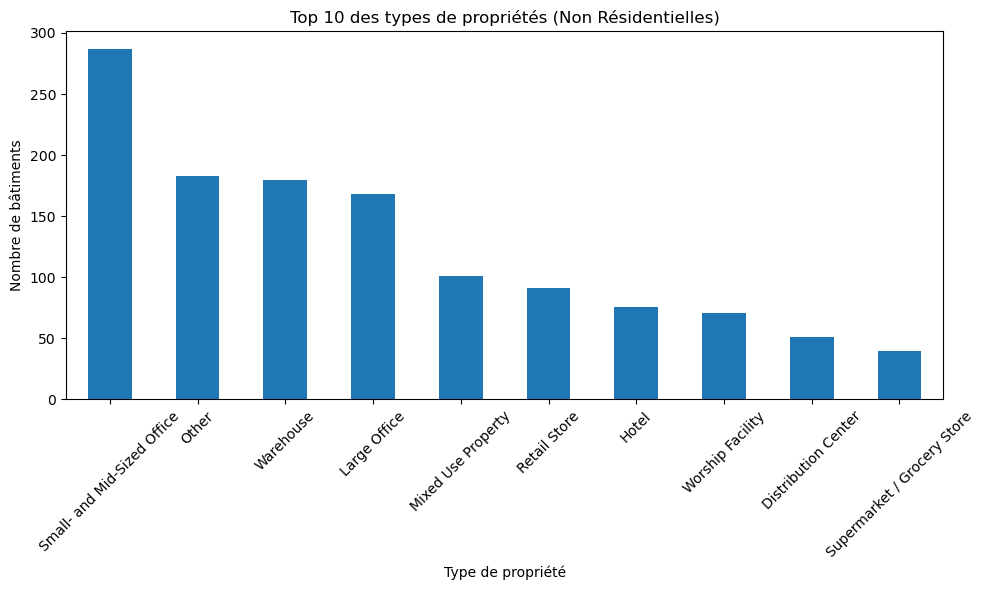

In [5]:

top_types = df['PrimaryPropertyType'].value_counts().head(10)
top_types.plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 des types de propriétés (Non Résidentielles)")
plt.ylabel("Nombre de bâtiments")
plt.xlabel("Type de propriété")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


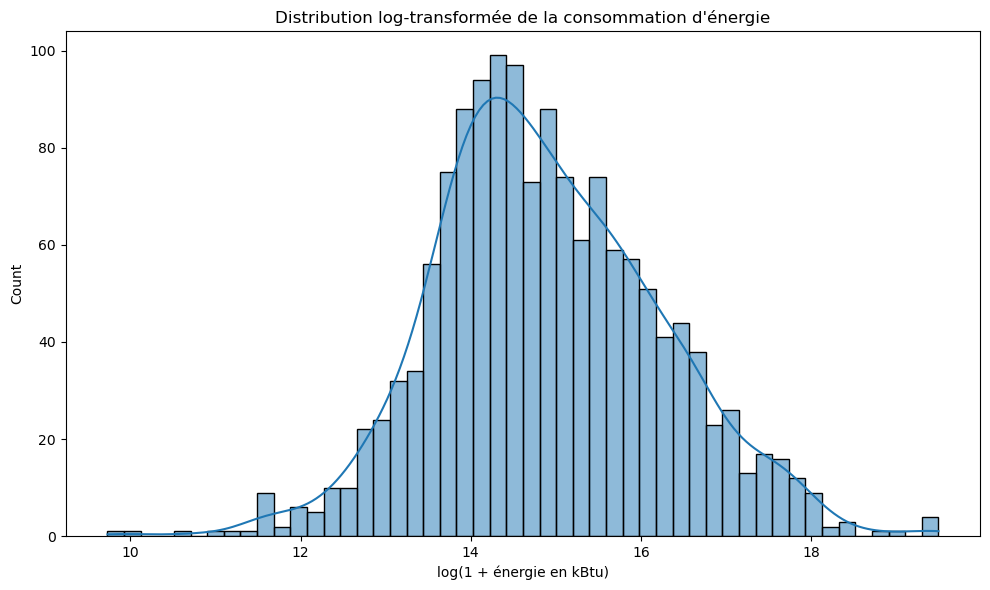

In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['SiteEnergyUse(kBtu)']), bins=50, kde=True)
plt.title("Distribution log-transformée de la consommation d'énergie")
plt.xlabel("log(1 + énergie en kBtu)")
plt.tight_layout()
plt.show()


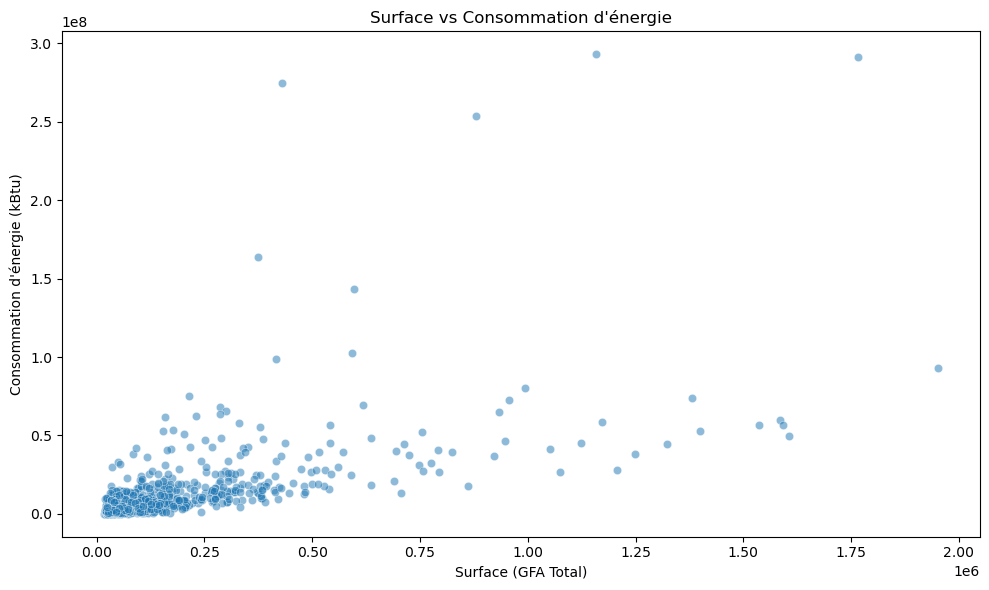

In [9]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', alpha=0.5)
plt.title("Surface vs Consommation d'énergie")
plt.xlabel("Surface (GFA Total)")
plt.ylabel("Consommation d'énergie (kBtu)")
plt.tight_layout()
plt.show()


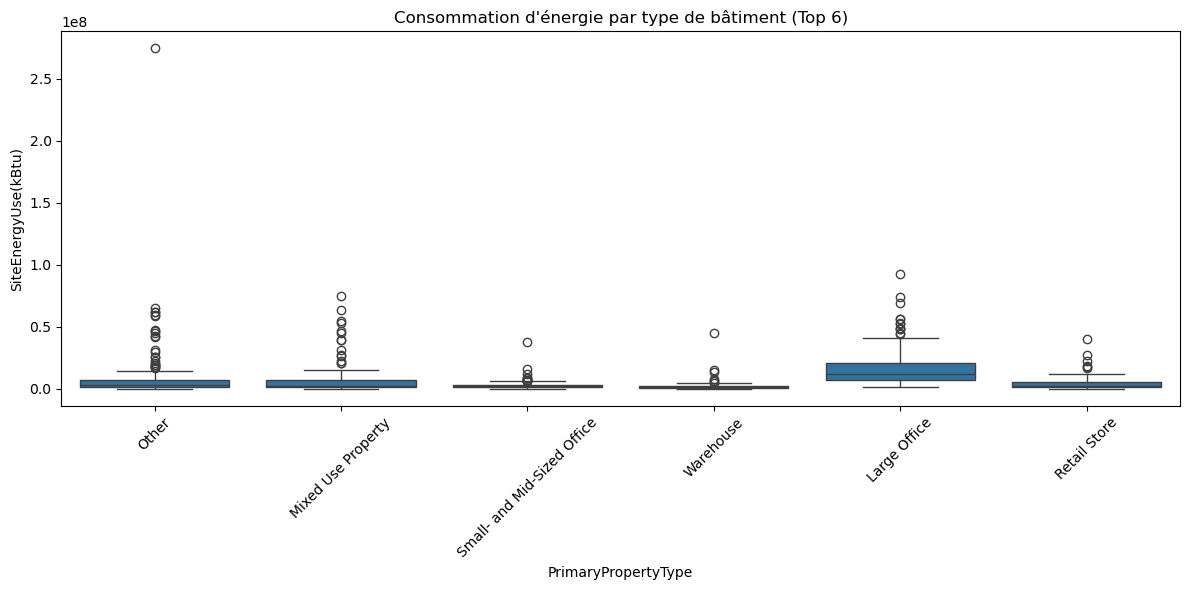

In [15]:

plt.figure(figsize=(12, 6))
top_types = df['PrimaryPropertyType'].value_counts().nlargest(6).index
sns.boxplot(data=df[df['PrimaryPropertyType'].isin(top_types)], 
            x='PrimaryPropertyType', y='SiteEnergyUse(kBtu)')
plt.title("Consommation d'énergie par type de bâtiment (Top 6)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


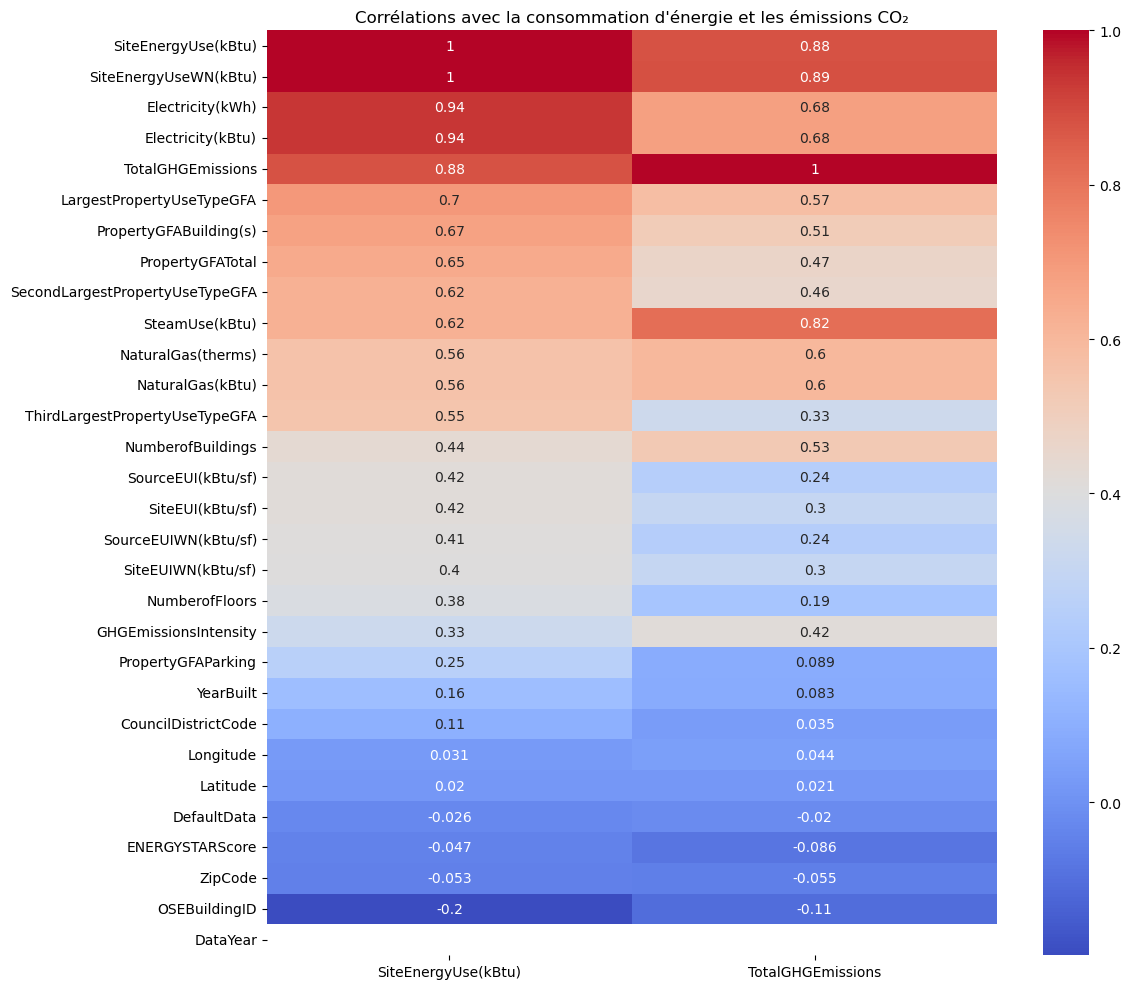

In [17]:

corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].sort_values(by='SiteEnergyUse(kBtu)', ascending=False), 
            annot=True, cmap="coolwarm")
plt.title("Corrélations avec la consommation d'énergie et les émissions CO₂")
plt.tight_layout()
plt.show()


In [19]:

df.to_csv("data_cleaned_seattle_2016.csv", index=False)
print("✅ Fichier nettoyé exporté : data_cleaned_seattle_2016.csv")


✅ Fichier nettoyé exporté : data_cleaned_seattle_2016.csv
